# Исследование данных о продаже компьютерных игр

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. \
Имеются исторические данные из открытых источников до 2016 года включительно о продажах игр, оценках пользователей и экспертов, жанрах и платформах. \
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [15]:
data = pd.read_csv('games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [17]:
data.duplicated().sum()

0

В файле 16715 строк. Это достаточно для анализа. \
В 6 столбцах из 10 есть пропуски. \
В столбце user_score с оценками пользователей определился строковый тип данных, возможно он содержит аномалии.\
Явных дубликатов в таблице нет.

## Предподготовка данных

### Приведем названия всех столбцов к нижнему регистру

In [18]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Заменим типы данных и пропуски в столбцах

In [20]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' означает To Be Determined (будет определено). Заменим 'tbd' и пропуски в столбце user_score "пробкой" 0. Заменим тип в столбце на float.

In [21]:
data.loc[data['user_score'] == "tbd", 'user_score'] = 0
data.user_score = data.user_score.fillna(0).astype('float')
data.user_score.unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

Пропуски в столбцах: name, genre заменять не чем. Оставим без изменений. 
Пропуски в столбце critic_score заменим на "пробку" 0. \
Пропуски в rating оставим.

In [22]:
data.critic_score = data.critic_score.fillna(0)

### Сохраним в новый столбец суммарные продажи во всех регионах.

In [23]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды.

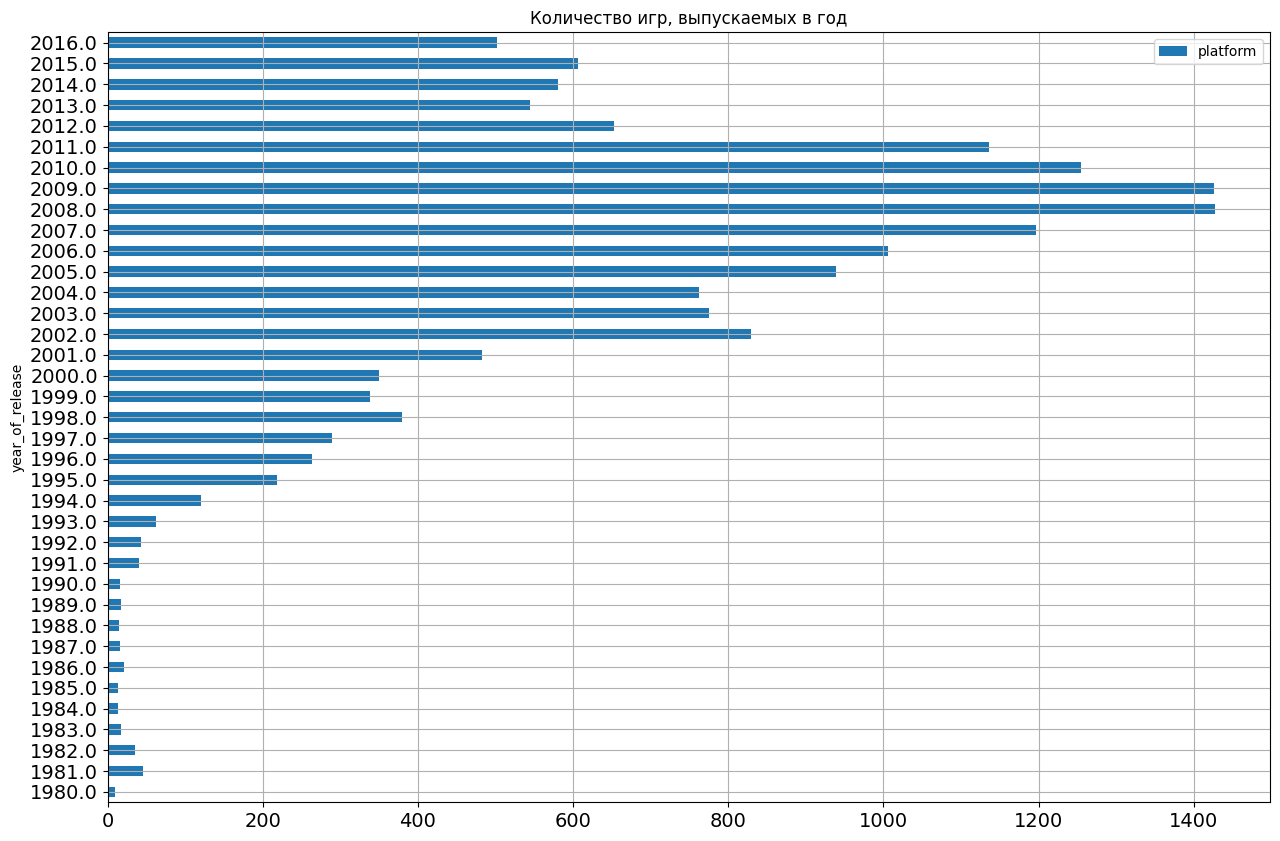

In [25]:
count_games_in_year = data.pivot_table(index = 'year_of_release', values = ['platform'], aggfunc = 'count')
count_games_in_year.plot(kind='barh',
                         figsize=(15, 10),
                         title='Количество игр, выпускаемых в год',
                         fontsize=14,                         
                         grid=True
                        );

До 1993 года включительно выпускалось очень мало игр.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

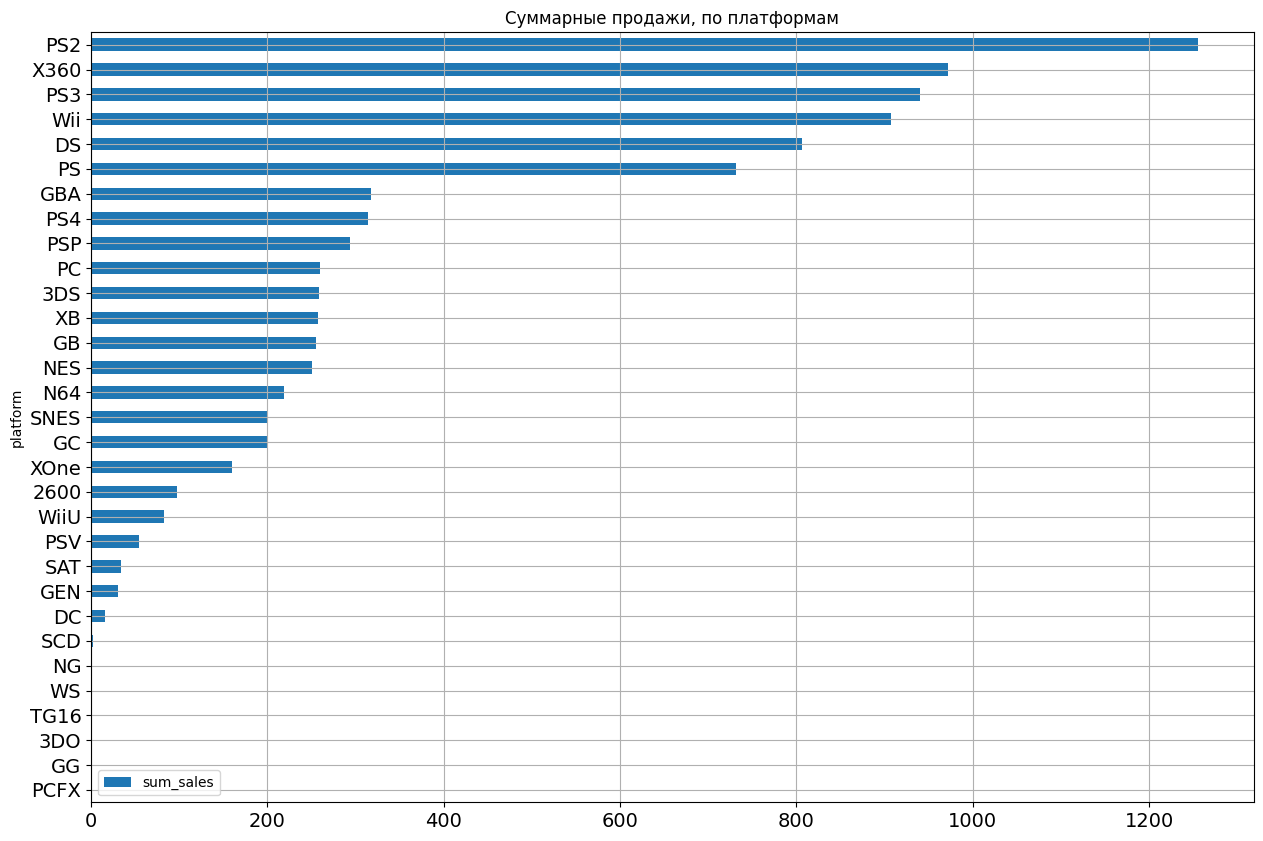

In [26]:
sum_sales_by_platform = (
    data
    .pivot_table(index = 'platform',
                 values = ['sum_sales'],
                 aggfunc = 'sum')
    .sort_values(by='sum_sales')
)
sum_sales_by_platform.plot(kind='barh',
                           figsize=(15, 10),
                           title='Суммарные продажи, по платформам',
                           fontsize=14,                         
                           grid=True
                          );

Выберем платформы с суммарными продажами более 200 млн. и построим распределение по годам.

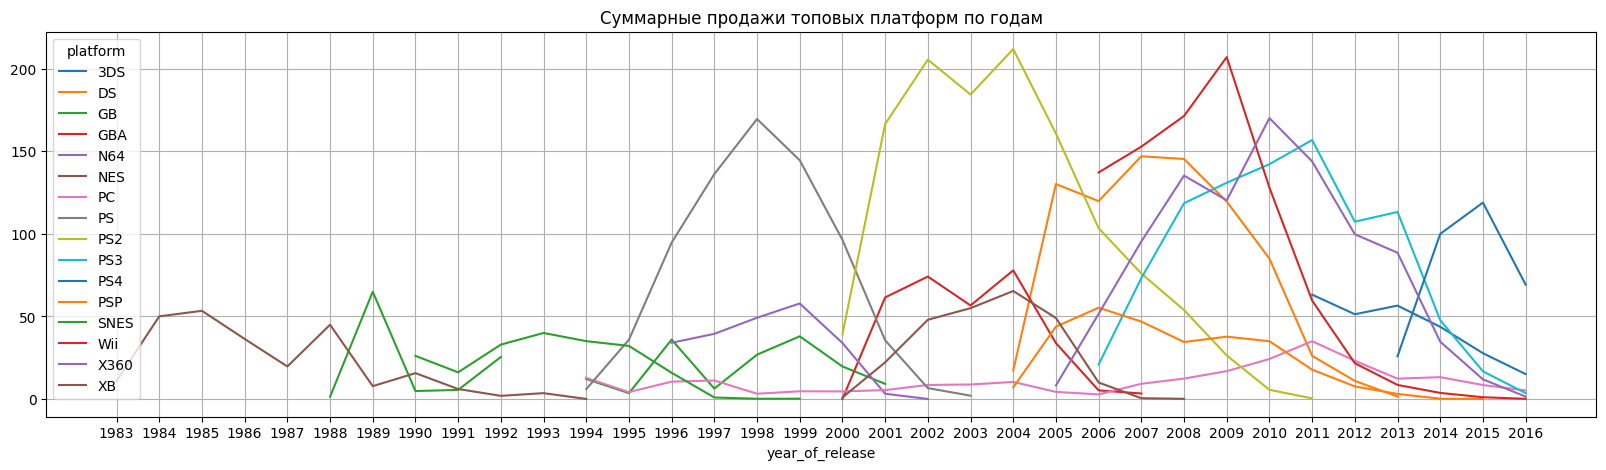

In [27]:
top_platform = sum_sales_by_platform.query('sum_sales > 200').index
sum_sales_in_top_platform = (
    data
    .query('platform in @top_platform')
    .pivot_table(index = ['year_of_release'], columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .reset_index()
    )
fig, ax = plt.subplots(figsize = (20,5))
ax = sum_sales_in_top_platform.plot(x = 'year_of_release',
                                    ax =ax,
                                    grid = True                 
                                   )

ticks = sum_sales_in_top_platform.year_of_release.astype('int')

ax.set_xticks(ticks)
ax.set_xticklabels(ticks, rotation= 0);
ax.set_title('Суммарные продажи топовых платформ по годам');

###  Выберем несколько потенциально прибыльных платформ.

На графике видно, что в среднем платформы существуют 9 - 10 лет. \
На 2016 год многие платформы уже перестали выпускать новые игры. \
Для прогноза на 2017 год возьмем данные с 2015-2016 годы.

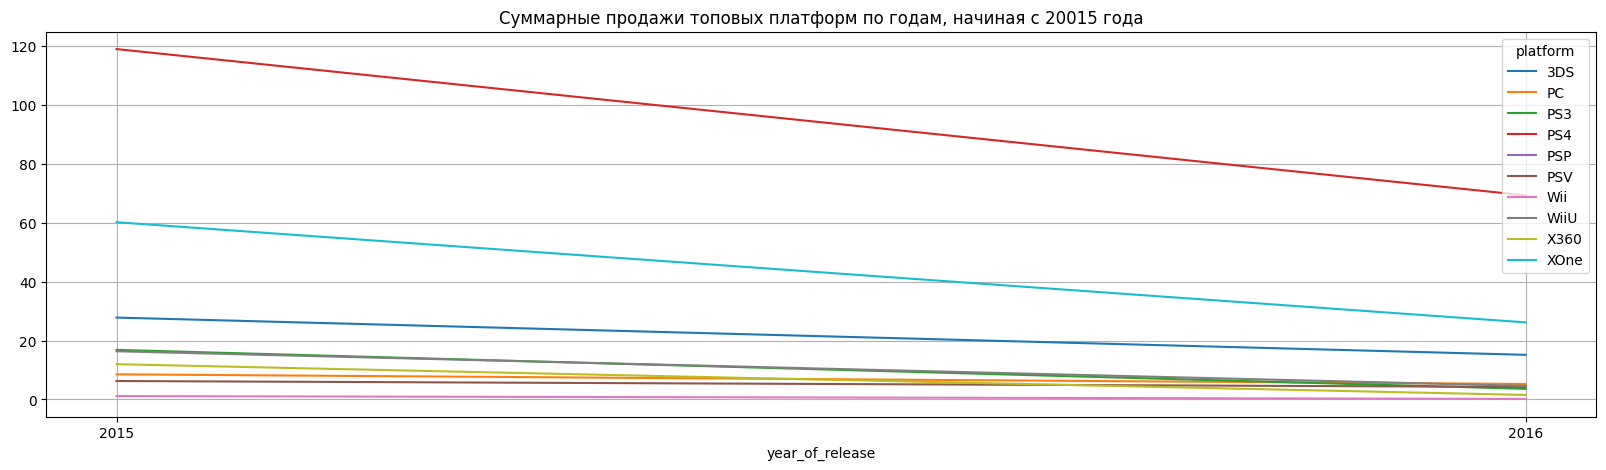

In [28]:
data = data.query('year_of_release >= 2015')
sum_sales_in_platform_by_year = (
    data
    .query('year_of_release > 2006')
    .pivot_table(index = ['year_of_release'], columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .reset_index()
    )


fig, ax = plt.subplots(figsize = (20,5))
ax = (sum_sales_in_platform_by_year  
      .plot(x = 'year_of_release',
                 ax =ax,
                 grid = True                 
                )
     )

ticks = (sum_sales_in_platform_by_year
         .query('year_of_release > 2006')
         .year_of_release
         .astype('int')
        )

ax.set_xticks(ticks)
ax.set_xticklabels(ticks, rotation= 0);
ax.set_title('Суммарные продажи топовых платформ по годам, начиная с 20015 года'); 

На графике виден спад по продажам на всех платформах. Три платформы, PS4, XOne и 3DS, на 2016 год значительно оторвались по объему продаж от основной массы. Сформируем суммарные продажи по платформам в 2016 году.

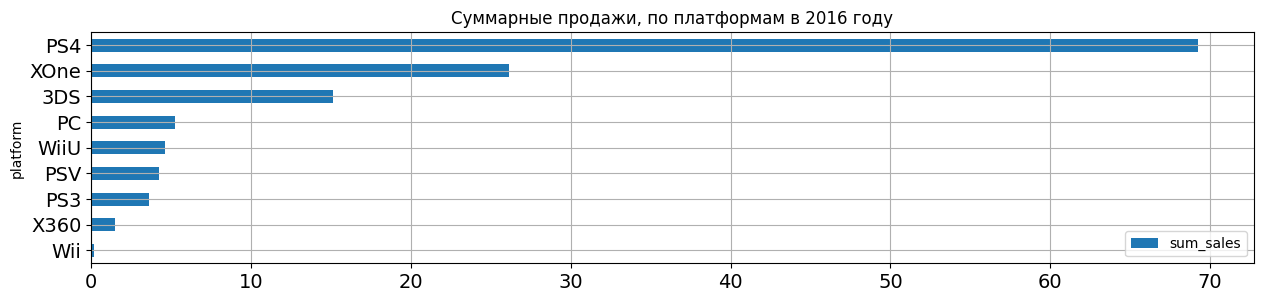

In [29]:
(
data
    .query('year_of_release == 2016')
    .pivot_table(index = 'platform', values = ['sum_sales'], aggfunc = 'sum')   
    .sort_values(by='sum_sales')
    .plot(kind='barh',
          figsize=(15, 3),
          title='Суммарные продажи, по платформам в 2016 году',
          fontsize=14,                         
          grid=True
         )
);

Вывод: все платформы показывают падение по продажам в актуальном периоде.\
PS4, XOne и 3DS всё равно сильно отрываются от конкурентов, что делает именно эти три платформы потенциально прибыльными в 2017 году.


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

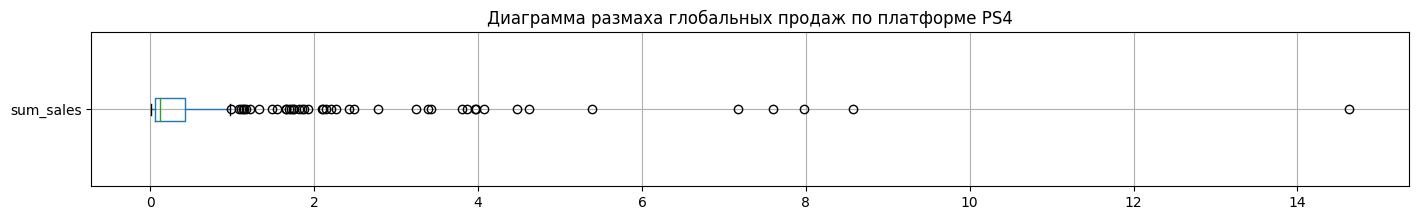

In [47]:
fig, ax = plt.subplots(figsize = (17,2))
ax = (data.query('platform == "PS4"')[['sum_sales']]
     .boxplot(vert = False, ax =ax)
     )
ax.set_title('Диаграмма размаха глобальных продаж по платформе PS4');

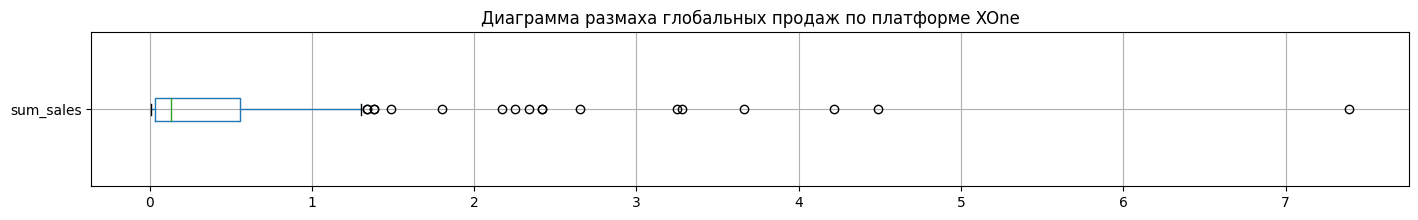

In [48]:
fig, ax = plt.subplots(figsize = (17,2))
ax = (data.query('platform == "XOne"')[['sum_sales']]
     .boxplot(vert = False, ax =ax)
     )
ax.set_title('Диаграмма размаха глобальных продаж по платформе XOne');

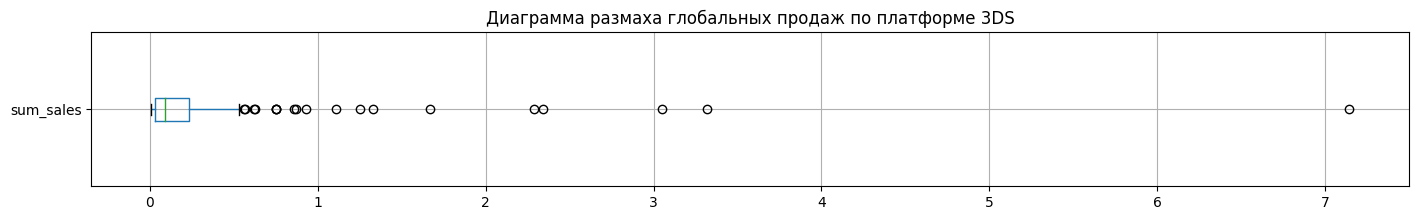

In [49]:
fig, ax = plt.subplots(figsize = (17,2))
ax = (data.query('platform == "3DS"')[['sum_sales']]
     .boxplot(vert = False, ax =ax)
     )
ax.set_title('Диаграмма размаха глобальных продаж по платформе 3DS');

In [53]:
(
    data.query('platform in ["PS4", "XOne", "3DS"]')
    .pivot_table(index = 'name', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .quantile([0.0012, 0.25, .5, .85, .9988])
    .style.format("{:,.2f}")
)

platform,3DS,PS4,XOne
0.001200,0.01,0.01,0.01
0.250000,0.03,0.05,0.04
0.500000,0.09,0.12,0.13
0.850000,0.50,0.94,1.09
0.998800,6.54,12.45,6.81


Сравнив диаграммы размаха удалось выяснить следующее: \
На платформе PS4 основная масса игр продавалась в объеме менее 1 млн копий. На первое место по суммарным продажам эту платформу вывели 5 топовых игр. \
На платформе XOne основная масса игр продавалась в объеме уже более 1 млн копий. Топовых игр уже гораздо меньше. \
На платформе 3DS основная масса игр продавалась в объеме примерно в два раза меньшем, чем у двух другиг платформ.\
\
Исходя из вышеизложенного следует, что игры на XOne продаются большим количеством копий, чем у PS4. Это делает XOne наиболее перспективной. 

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Возьмем самую популярную платформу в актуальном периоде -  PS4

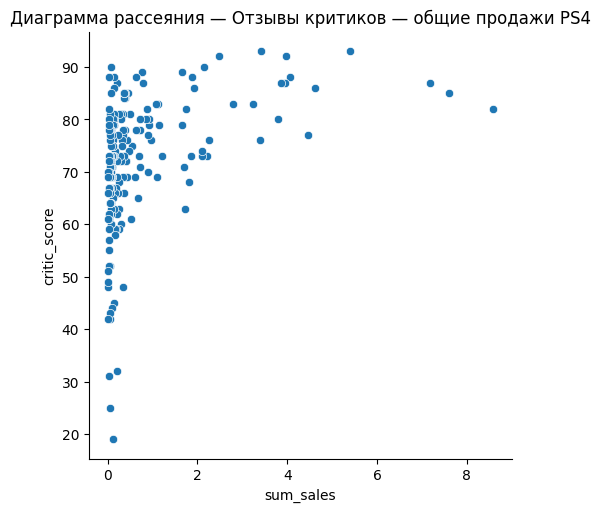

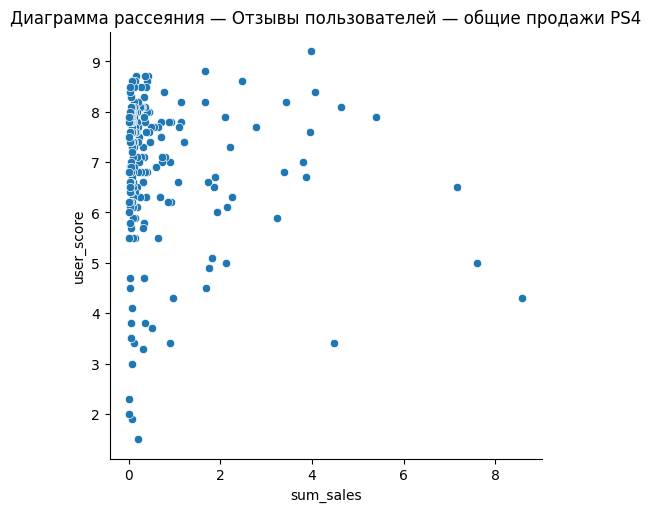

In [31]:
sns.relplot(data=data.query('platform == "PS4" and critic_score != 0'),
                x='sum_sales',
                y='critic_score',
                kind='scatter')
plt.title('Диаграмма рассеяния — Отзывы критиков — общие продажи PS4')


sns.relplot(data=data.query('platform == "PS4" and user_score != 0'),
                x='sum_sales',
                y='user_score',
                kind='scatter')
plt.title('Диаграмма рассеяния — Отзывы пользователей — общие продажи PS4');

In [32]:
corr_1 = (data
          .query('platform == "PS4" and critic_score != 0')
          .critic_score
          .corr(data
                .query('platform == "PS4" and critic_score != 0')
                .sum_sales)
          .round(2)
         )
corr_2 = (data
          .query('platform == "PS4" and user_score != 0')
          .user_score
          .corr(data
                .query('platform == "PS4" and user_score != 0')
                .sum_sales)
          .round(2)
         )
print(f'Корреляция между отзывами критиков и продажами: {corr_1}')
print(f'Корреляция между отзывами пользователей и продажами: {corr_2}')

Корреляция между отзывами критиков и продажами: 0.39
Корреляция между отзывами пользователей и продажами: -0.06


Вывод: продажи игр на платформе PS4 зависят от отзывов критиков в большей мере, чем от отзывов пользователей. \
*Отзывы критиков.* \
Положительная корреляция между отзывами критиков и продажами говорит о том, что с увеличением одного показателя увеличивается и другой. Но низкие значения говорят о том, что данная зависимость не линейна. \
На графика видно, что с увеличением рейтингов критиков увеличивается только верхняя граница итоговых продаж.\
Игры с оценкой критиков ниже 60 практически не достигали общих продаж выше 0,5 млн копий. Игры с оценкой от 60 до 80, могут достигать порога в 5 млн копий. Некоторые игры с оценкой выше 80 достигали суммарных продаж более 8 млн копий.\
*Отзывы пользователей* \
С увеличением рейтинга пользователей также увеличивается количество игр, продаваемых большим тиражом. Но самые продаваемые игры, с тиражом более 7 млн копий, имеют рейтинг пользователей ниже 5. Что привело к отрицательной корреляции.\
В то же время нижняя граница общих продаж остается в районе 0 на всём диапозоне как оценок пользователей, так и оценок критиков.

### Соотнесем выводы с продажами игр на других платформах.

Корреляция между отзывами критиков и продажами PS4: 0.3928485555130601
Корреляция между отзывами критиков и продажами XOne: 0.43088874582136805
Корреляция между отзывами критиков и продажами 3DS: 0.17757455046092874
Корреляция между отзывами критиков и продажами WiiU: 0.317045711769622
Корреляция между отзывами критиков и продажами PS3: nan


/home/ru/jupyter/env/lib/python3.9/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/ru/jupyter/env/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Корреляция между отзывами критиков и продажами X360: nan
Корреляция между отзывами критиков и продажами PC: 0.3773317477241351
Корреляция между отзывами критиков и продажами Wii: nan
Корреляция между отзывами критиков и продажами PSV: 0.0036040833609397678
Корреляция между отзывами критиков и продажами PSP: nan


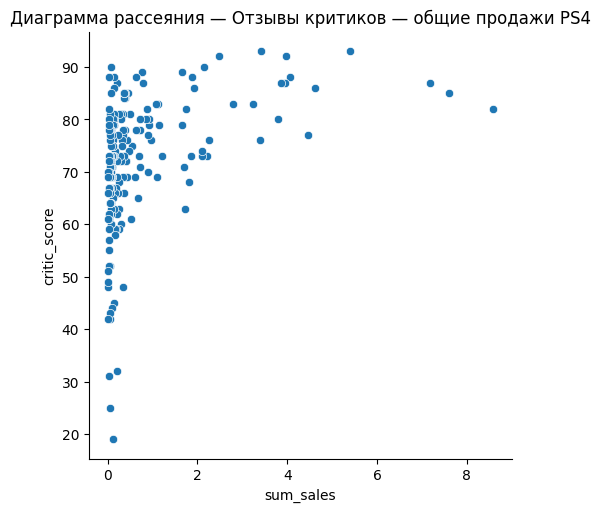

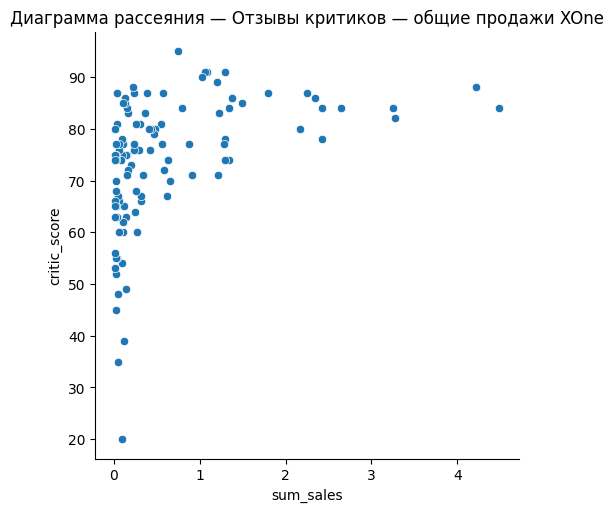

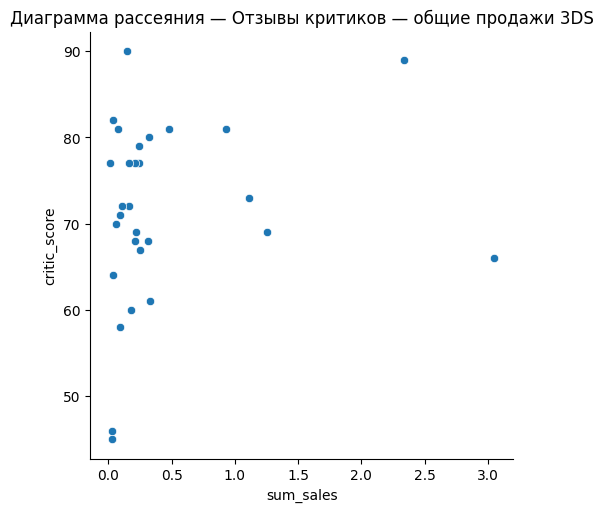

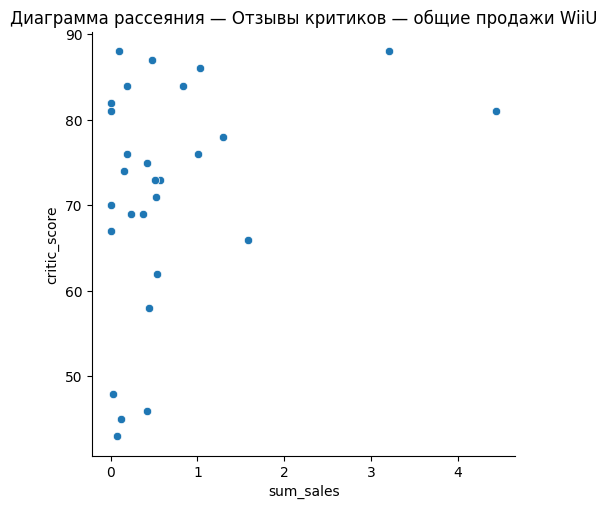

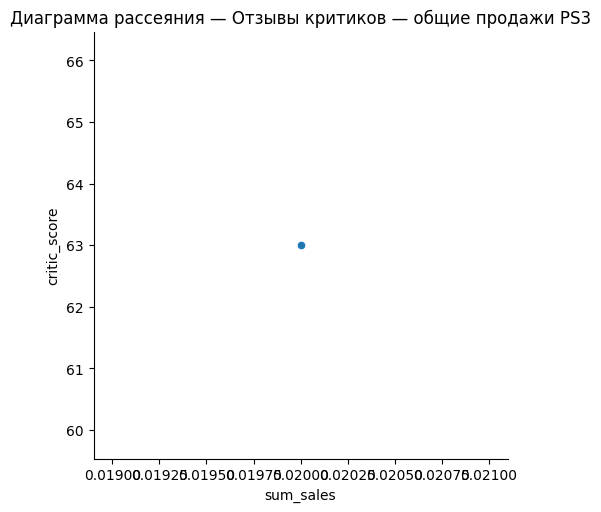

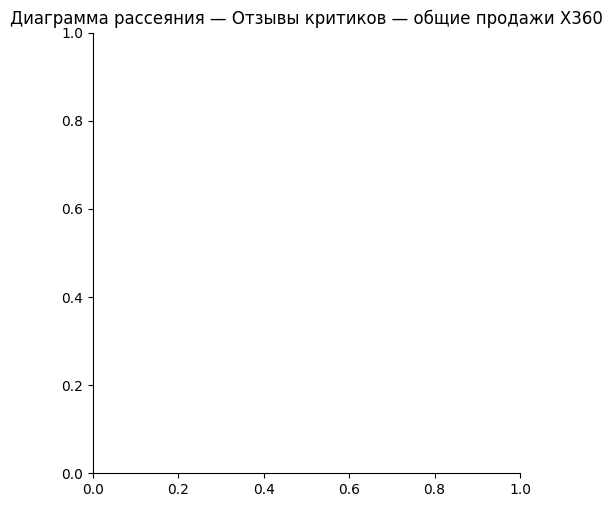

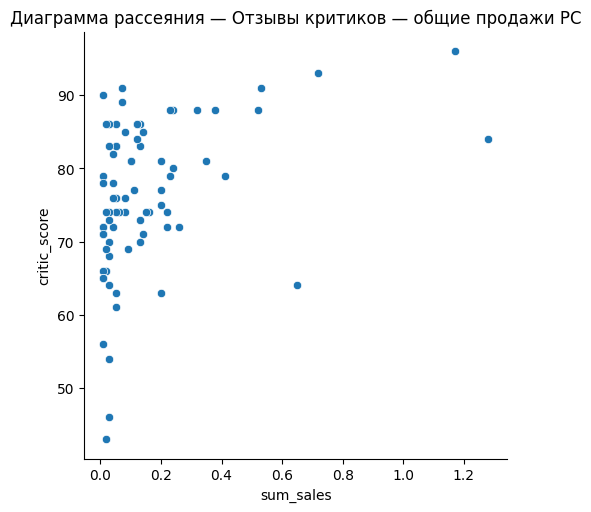

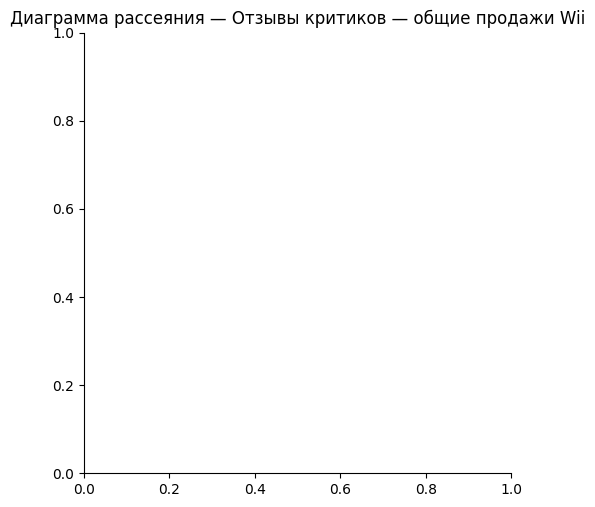

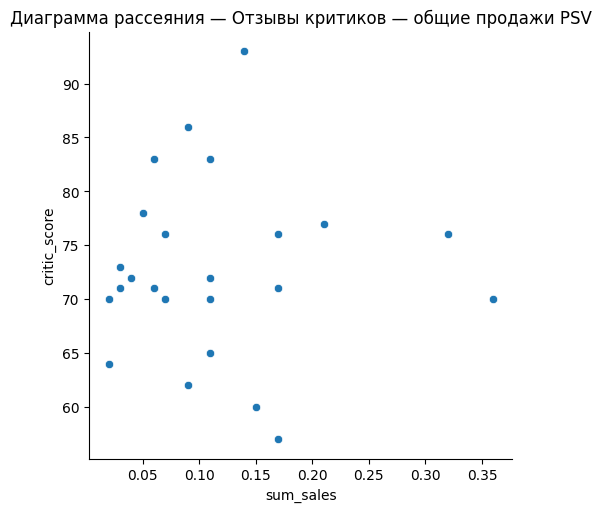

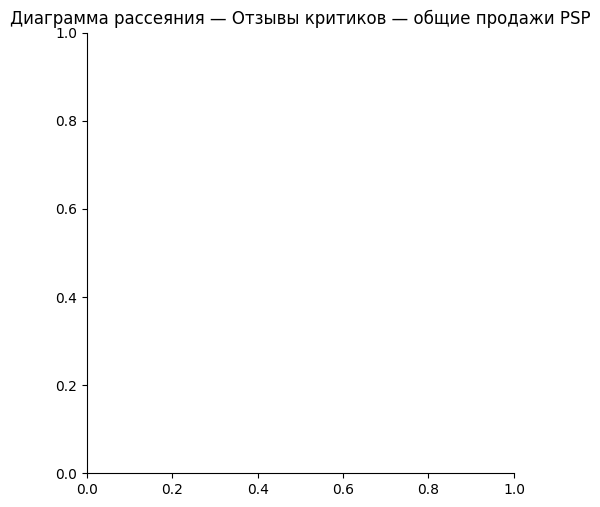

In [60]:
for row in data.platform.unique():
    sns.relplot(data=data.query('platform == @row and critic_score != 0'),
                x='sum_sales',
                y='critic_score',
                kind='scatter')
    plt.title(f'Диаграмма рассеяния — Отзывы критиков — общие продажи {row}')
    
    corr_1 = (data
              .query('platform == @row and critic_score != 0')
              .critic_score
              .corr(data
                    .query('platform == @row and critic_score != 0')
                    .sum_sales)
             )
    print(f'Корреляция между отзывами критиков и продажами {row}: {corr_1}')

Корреляция между отзывами пользователей и продажами PS4: -0.05973845712638215
Корреляция между отзывами пользователей и продажами XOne: -0.04146733387366271
Корреляция между отзывами пользователей и продажами 3DS: 0.19879627008102982
Корреляция между отзывами пользователей и продажами WiiU: 0.3635185724809445
Корреляция между отзывами пользователей и продажами PS3: -0.16529542277898507
Корреляция между отзывами пользователей и продажами X360: -0.2813082274094897
Корреляция между отзывами пользователей и продажами PC: 0.15038053045029076
Корреляция между отзывами пользователей и продажами Wii: nan
Корреляция между отзывами пользователей и продажами PSV: 0.07833473556248864
Корреляция между отзывами пользователей и продажами PSP: nan


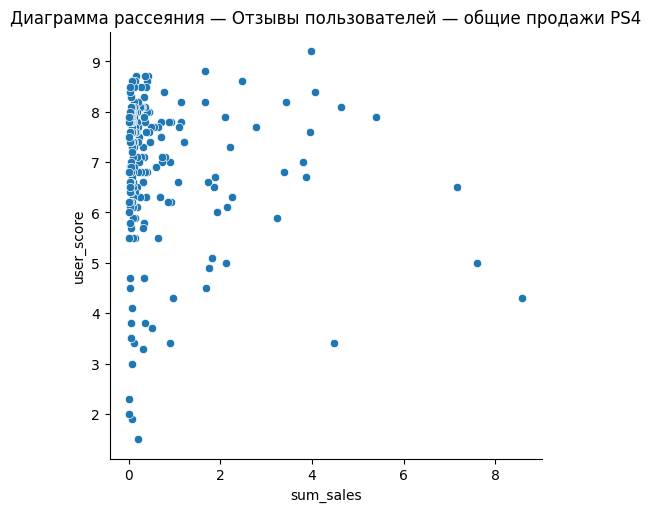

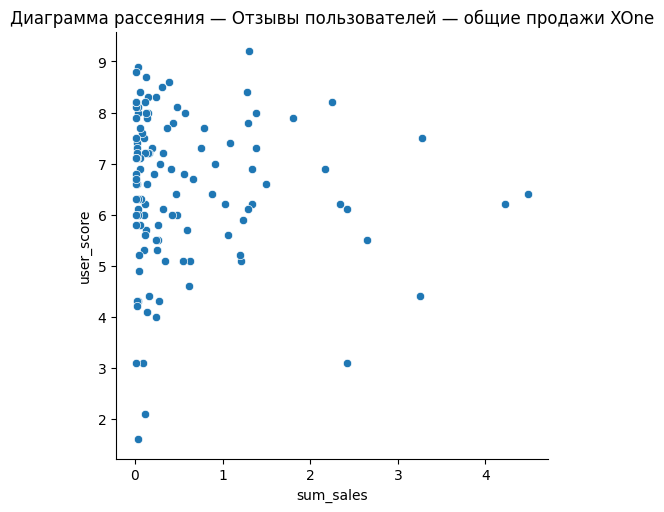

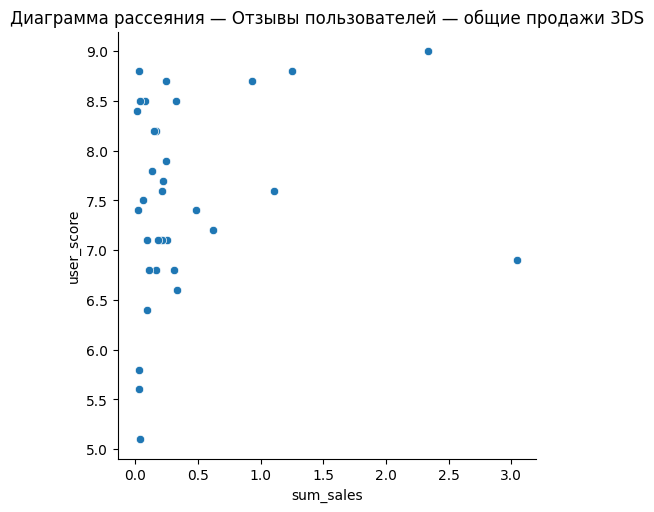

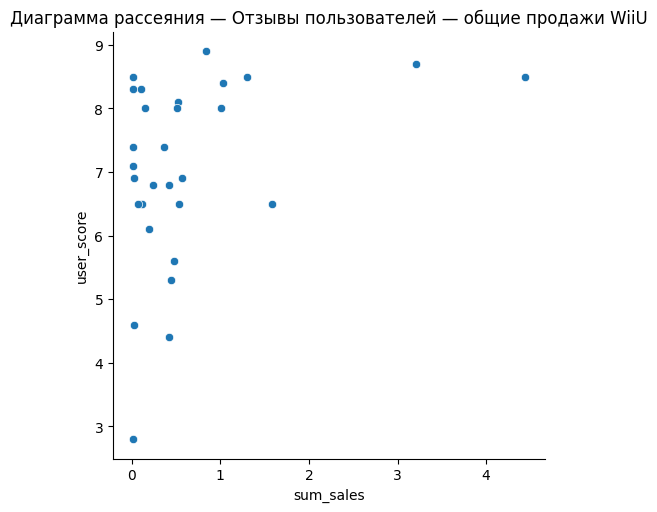

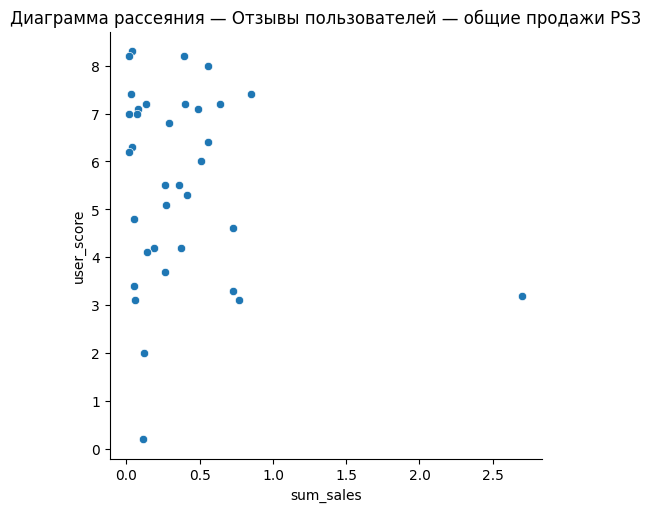

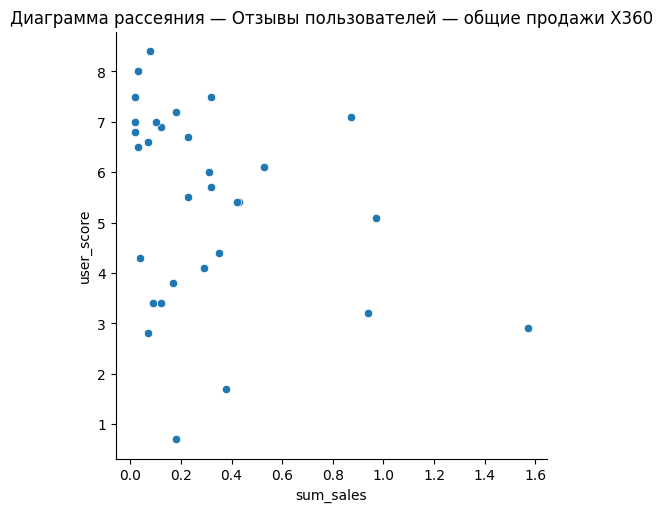

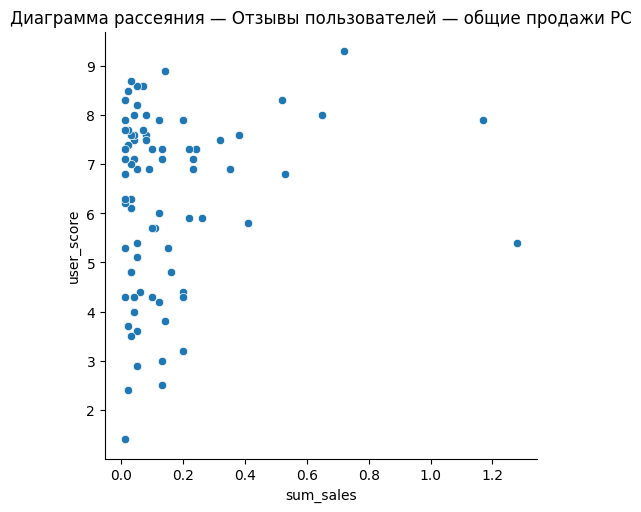

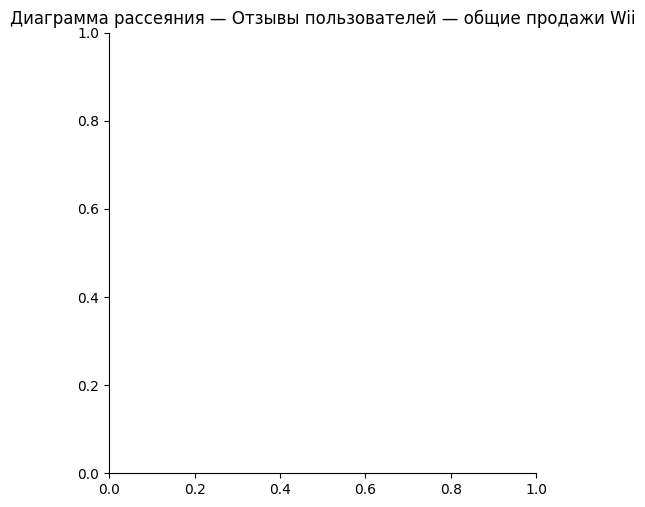

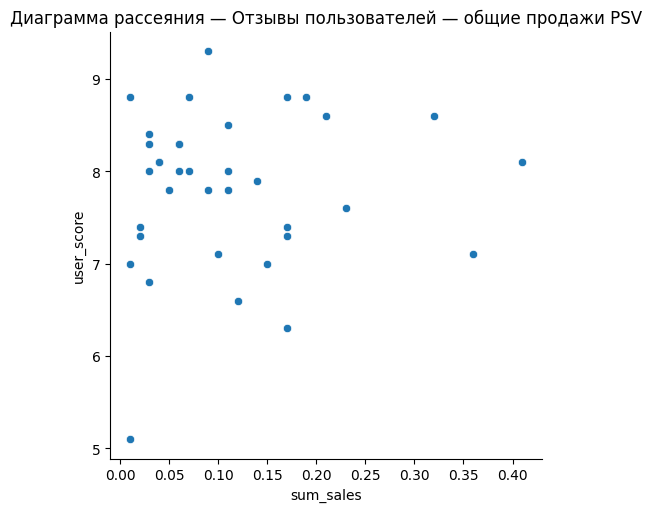

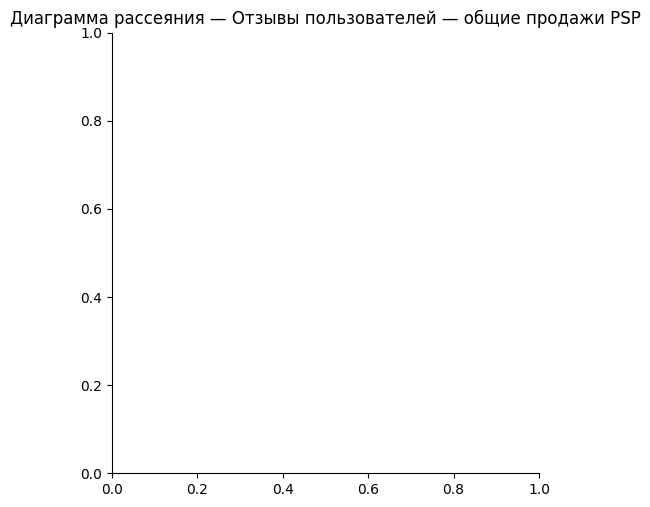

In [34]:
for row in data.platform.unique():
    sns.relplot(data=data.query('platform == @row and user_score != 0'),
                x='sum_sales',
                y='user_score',
                kind='scatter')
    plt.title(f'Диаграмма рассеяния — Отзывы пользователей — общие продажи {row}')
    corr_2 = (data
              .query('platform == @row and user_score != 0')
              .user_score
              .corr(data
                    .query('platform == @row and user_score != 0')
                    .sum_sales)
             )
    print(f'Корреляция между отзывами пользователей и продажами {row}: {corr_2}')

Судя по графикам взаимосвязь между продажами игр на других платформах и отзывами пользователей или критиков аналогична выявленной взаимосвязи на платформе PS4.

### Посмотрим на общее распределиение игр по жанрам.

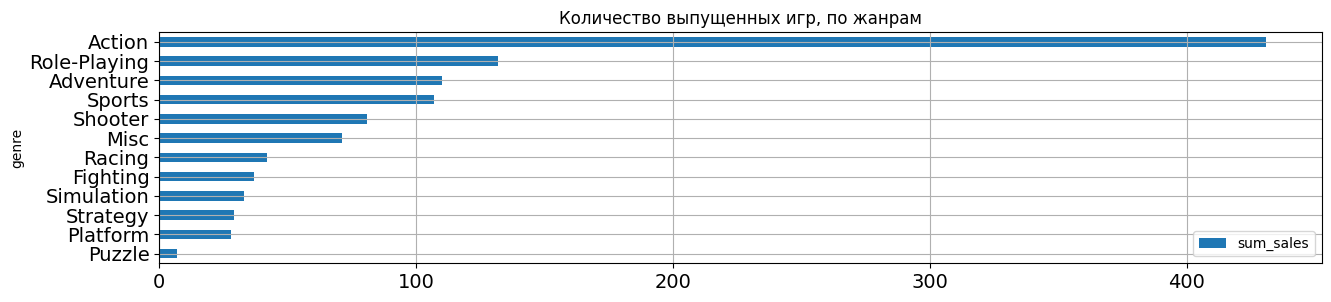

In [35]:
(
data
    .pivot_table(index = 'genre', values = ['sum_sales'], aggfunc = 'count')   
    .sort_values(by='sum_sales')
    .plot(kind='barh',
          figsize=(15, 3),
          title='Количество выпущенных игр, по жанрам',
          fontsize=14,                         
          grid=True
         )
);

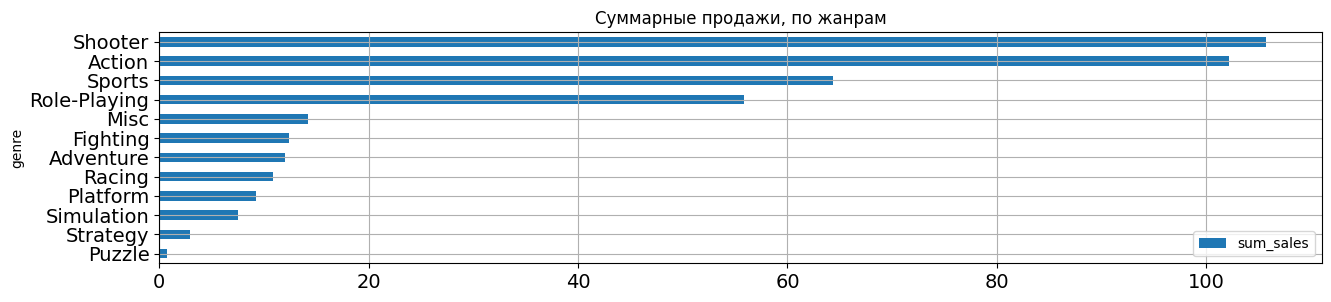

In [36]:
(
data
    .pivot_table(index = 'genre', values = ['sum_sales'], aggfunc = 'sum')   
    .sort_values(by='sum_sales')
    .plot(kind='barh',
          figsize=(15, 3),
          title='Суммарные продажи, по жанрам',
          fontsize=14,                         
          grid=True
         )
);

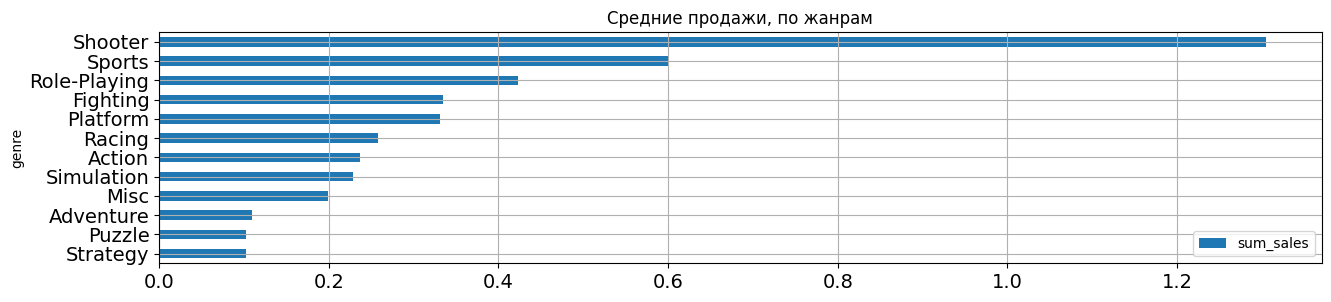

In [37]:
(
data
    .pivot_table(index = 'genre', values = ['sum_sales'], aggfunc = 'mean')   
    .sort_values(by='sum_sales')
    .plot(kind='barh',
          figsize=(15, 3),
          title='Средние продажи, по жанрам',
          fontsize=14,                         
          grid=True
         )
);

Вывод: Больше всего выпускают игр жанра Action.\
Самыми прибыльными являются жанры Shooter и Sports.\
Самые высокие продажи у игр жанра Shooter и Action. Самые низкие у жанров Puzzle и Strategy.



## Составим портрет пользователя каждого региона

### Северная Америка.

In [38]:
def grafic(index, country, i = 5):
    (
        data
        .pivot_table(index = index,
                     values = ['na_sales','eu_sales', 'jp_sales', 'other_sales'],
                     aggfunc = 'sum')        
        .rename(columns = {'na_sales':'Северная Америка',
                           'eu_sales':'Европа',
                           'jp_sales':'Япония', 
                           'other_sales':'другие страны'})        
        .sort_values(by=country)
        .tail(i)
        .plot(kind='barh',
              figsize=(15, 2),
              title=f'Суммарные продажи, {country}',
              fontsize=14,
              grid=True,
              legend = False,
              y = country
             )
    );
    (
        data
        .pivot_table(index = index,
                     values = ['na_sales','eu_sales', 'jp_sales', 'other_sales'],
                     aggfunc = 'sum')
        .rename(columns = {'na_sales':'Северная Америка',
                           'eu_sales':'Европа',
                           'jp_sales':'Япония', 
                           'other_sales':'другие страны'})        
        .sort_values(by=country)
        .tail(i)
        .plot(kind='pie',
              autopct='%1.0f%%',
              subplots = True,
              figsize=(5, 5),
              title=f'Доли продаж, {country}',
              fontsize=14,
              grid=True,
              legend = False,
              y = country
             )
    );

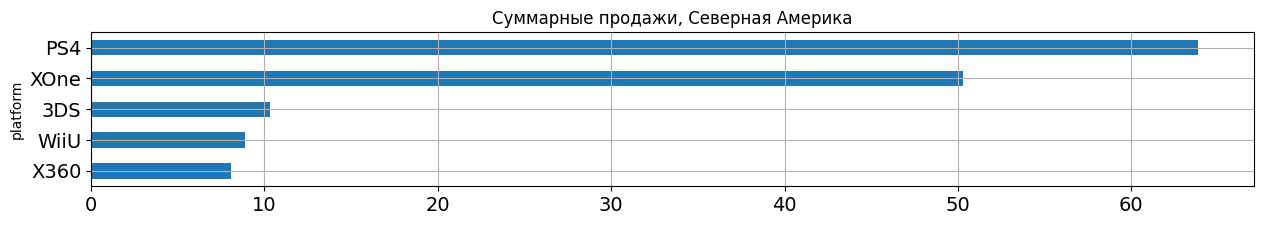

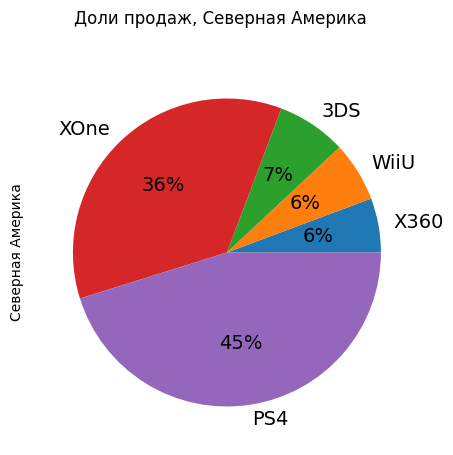

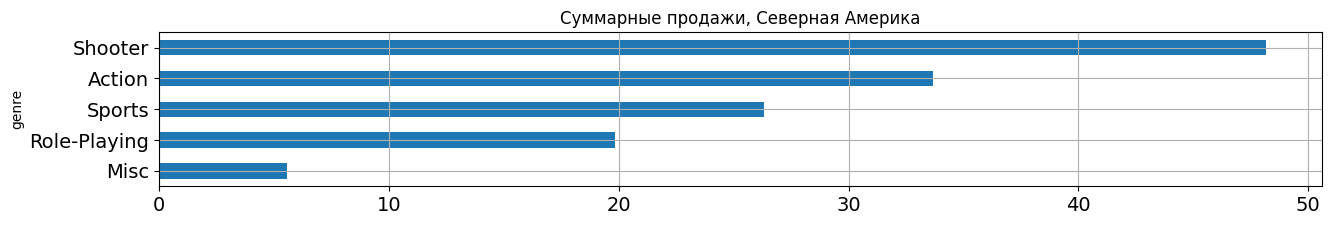

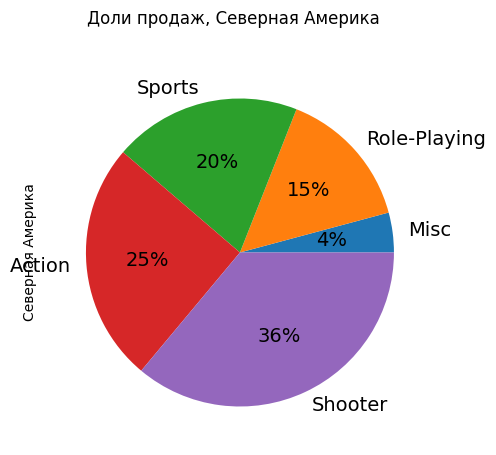

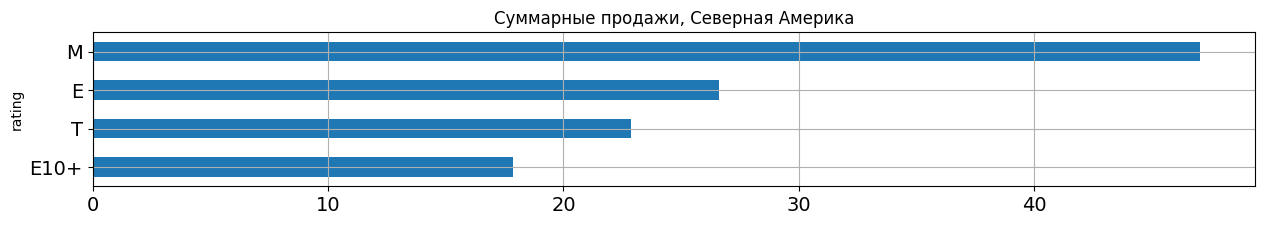

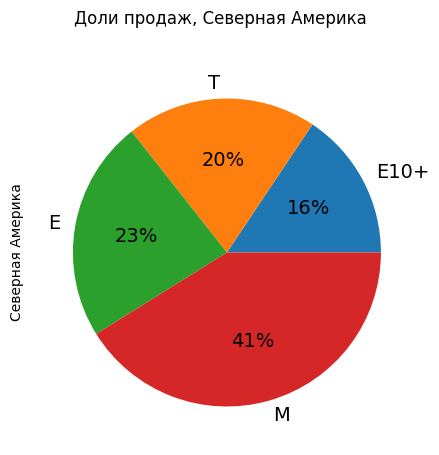

In [39]:
my_list = ['platform', 'genre', 'rating'] 

for index in my_list:
    grafic(index, 'Северная Америка')

Вывод: В Северной Америке самая популярная платформа PS4.Второе место у XOne. Вместе они занимают 81% рынка. \
Самый популярный жанр Shooter. Второе место занимает Action. Вместе они занимают 61% рынка.\
Больше всего покупают игры категории "М".


### Европа.

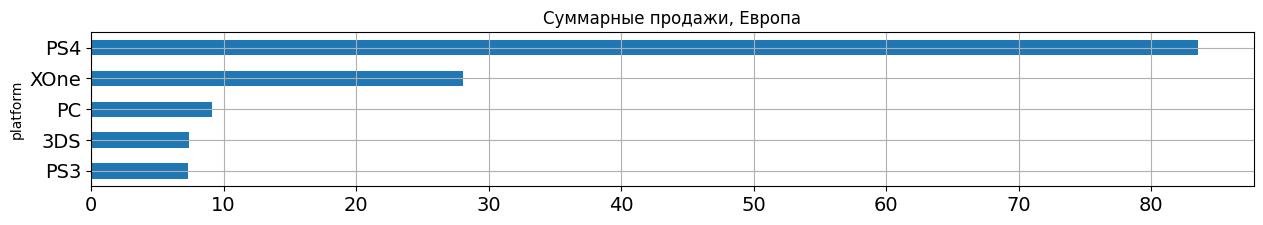

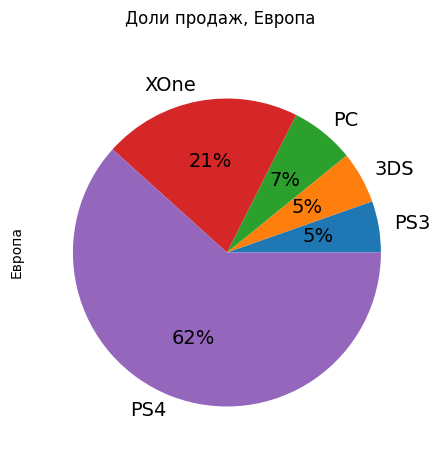

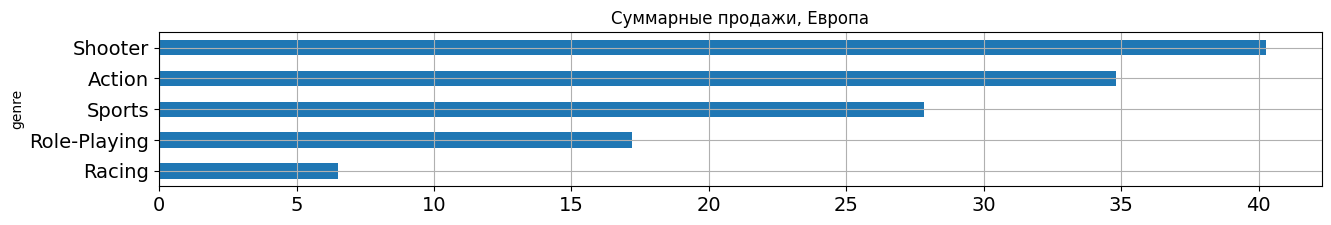

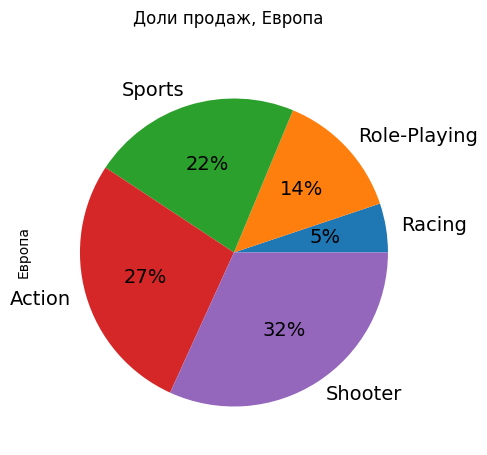

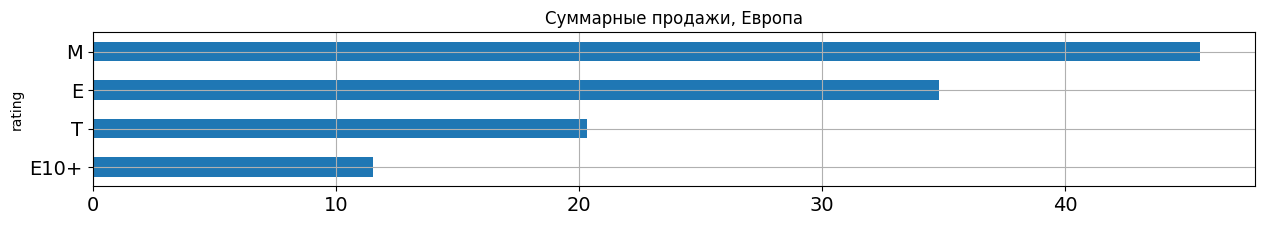

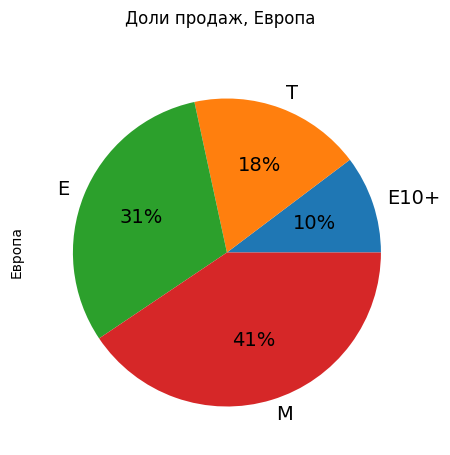

In [40]:
for index in my_list:
    grafic(index, 'Европа')

Вывод: В Европе самая популярная платформа PS4 - 62% рынка. \
Самый популярный жанр Shooter - 32%. Второе место занимает Action - 27%.\
Больше всего покупают игры категории "М".


### Япония.

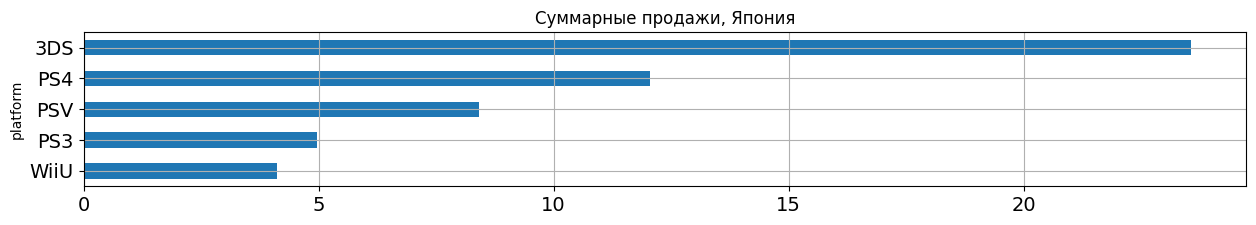

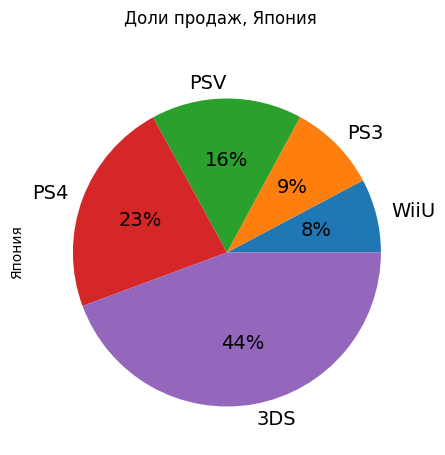

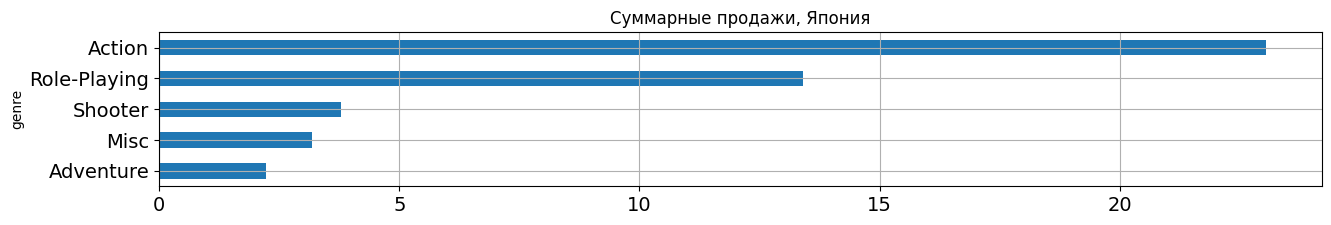

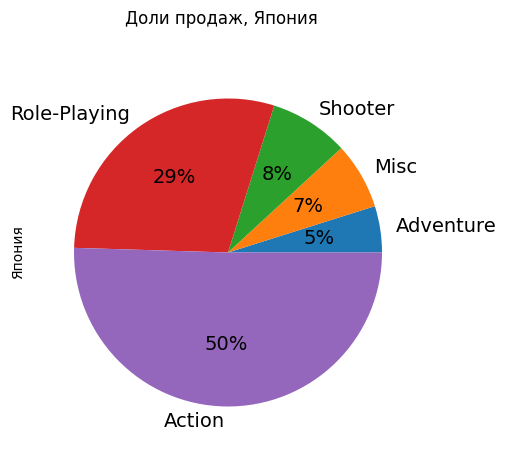

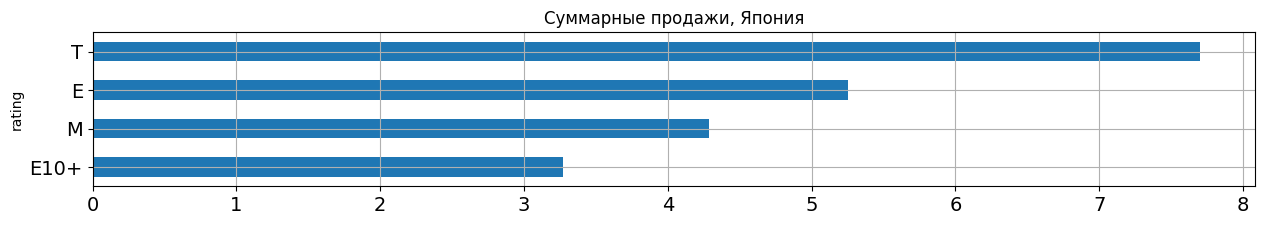

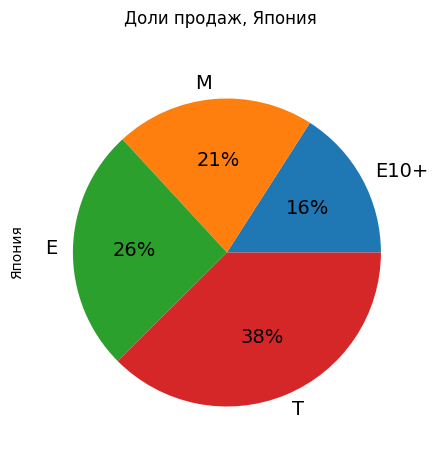

In [41]:
for index in my_list:
    grafic(index, 'Япония')

Вывод: В Японии первое место у платформы 3DS - 44%. \
Самый популярный жанр Action, 50% всего рынка. Второе место у Role-Playing, 29%.\
Больше всего покупают игры категории "Е" и "T", они занимают 64% рынка.\
В отличии от остальных регионов, в Японии только 21% игр категории "М".


## Проверка гипотез.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем метод:\
\
        ststs.ttest_ind(array1,array2,equal_var)\
\
        equal_var = False, т.к. выборки разного размера.


### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средний рейтинг (user_score) платформы PC = Средний рейтинг (user_score) платформы XOne \
H_a: Средний рейтинг (user_score) платформы PC ≠ Средний рейтинг (user_score) платформы XOne \
alpha = 0.05

In [42]:
results = st.ttest_ind(
    data[(data['user_score'] != 0)&(data['platform'] == 'XOne')]['user_score'],
    data[(data['user_score'] != 0)&(data['platform'] == 'PC')]['user_score'],
    equal_var = False
    )

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Вывод: Гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не удалось отвергнуть.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Средний рейтинг (user_score) жанра Action = Средний рейтинг (user_score) жанра Sports \
H_a: Средний рейтинг (user_score) жанра Action ≠ Средний рейтинг (user_score) жанра Sports \
alpha = 0.05

In [43]:
results = st.ttest_ind(
    data[(data['user_score'] != 0)&(data['genre'] == 'Action')]['user_score'],
    data[(data['user_score'] != 0)&(data['genre'] == 'Sports')]['user_score'],
    equal_var = False
    )

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.97163549920592e-10
Отвергаем нулевую гипотезу


Вывод: Гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.

## Общий вывод.

**На этапе исследовательского анализа данных удалось выяснить, что:** \
До 1993 года включительно выпускалось очень мало игр.\
Все платформы, за исключением PS4 и XOne, показывают падение по продажам начиная с 2013 года.\
PS4 и XOne показывали рост до 2015года включительно, но в 2016 также сильно потеряли в суммарных продажах.\
Но по итогам 2016 года PS4, XOne и 3DS всё равно сильно отрываются от конкурентов, что делает именно эти три платформы потенциально прибыльными в 2017 году. \
В среднем платформы существуют 9 - 10 лет. \
Для прогноза на 2017 год возьмем данные с 2015-2016 годы. \
Все платформы показывают падение по продажам в актуальном периоде.\
PS4, XOne и 3DS всё равно сильно отрываются от конкурентов, что делает именно эти три платформы потенциально прибыльными в 2017 году.\
у половины всех платформ глобальные продажи с 2015 года меньше 25 млн.копий\
В то же время у 2 платформ, PS4 и XOne, глобальные продажи сильно отрываются от основной массы. \
Сравнив диаграммы размаха удалось выяснить следующее: \
На платформе PS4 основная масса игр продавалась в объеме менее 1 млн копий. На первое место по суммарным продажам эту платформу вывели 5 топовых игр. \
На платформе XOne основная масса игр продавалась в объеме уже более 1 млн копий. Топовых игр уже гораздо меньше. \
На платформе 3DS основная масса игр продавалась в объеме примерно в два раза меньшем, чем у двух другиг платформ.\
\
Исходя из вышеизложенного следует, что игры на XOne продаются большим количеством копий, чем у PS4. Это делает XOne наиболее перспективной.\
**Вывод: Потенциально прибыльными в 2017 году вероятно будут 3 платформы в следующем порядке:**

- **XOne**
- **PS4**
- **3DS**


**Влияние отзывов пользователей и критиков на продажи.**
Исследование показало, что продажи игр на платформе PS4 зависят от отзывов критиков в большей мере, чем от отзывов пользователей. \
*Отзывы критиков.* \
Положительная корреляция между отзывами критиков и продажами говорит о том, что с увеличением одного показателя увеличивается и другой. Но низкие значения говорят о том, что данная зависимость не линейна. \
На графика видно, что с увеличением рейтингов критиков увеличивается только верхняя граница итоговых продаж.\
Игры с оценкой критиков ниже 60 практически не достигали общих продаж выше 0,5 млн копий. Игры с оценкой от 60 до 80, могут достигать порога в 5 млн копий. Некоторые игры с оценкой выше 80 достигали суммарных продаж более 8 млн копий.\
*Отзывы пользователей* \
С увеличением рейтинга пользователей также увеличивается количество игр, продаваемых большим тиражом. Но самые продаваемые игры, с тиражом более 7 млн копий, имеют рейтинг пользователей ниже 5. Что привело к отрицательной корреляции.\
В то же время нижняя граница общих продаж остается в районе 0 на всём диапозоне как оценок пользователей, так и оценок критиков.
Взаимосвязь между продажами игр на других платформах и отзывами пользователей или критиков аналогична выявленной взаимосвязи на платформе PS4. \
\
**Распределение игр по жанрам.** \
Больше всего выпускают игр жанра Action.\
Самыми прибыльными являются жанры Shooter и Sports.\
Самые высокие продажи у игр жанра Shooter и Action. Самые низкие у жанров Puzzle и Strategy. \
\
**Портрет пользователя каждого региона.** \
*В Северной Америке* самая популярная платформа PS4.Второе место у XOne. Вместе они занимают 81% рынка.
Самый популярный жанр Shooter. Второе место занимает Action. Вместе они занимают 61% рынка.
Больше всего покупают игры категории "М". \
*В Европе* самая популярная платформа PS4 - 62% рынка. \
Самый популярный жанр Shooter - 32%. Второе место занимает Action - 27%.\
Больше всего покупают игры категории "М". \
*В Японии* В Японии первое место у платформы 3DS - 44%.\
Самый популярный жанр Action, 50% всего рынка. Второе место у Role-Playing, 29%.\
Больше всего покупают игры категории "Е" и "T", они занимают 64% рынка.\
В отличии от остальных регионов, в Японии только 21% игр категории "М". \
\
**Проверка гипотез.** \
Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась. \
Гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.

